In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

## Single variable Linear Regression

In [6]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


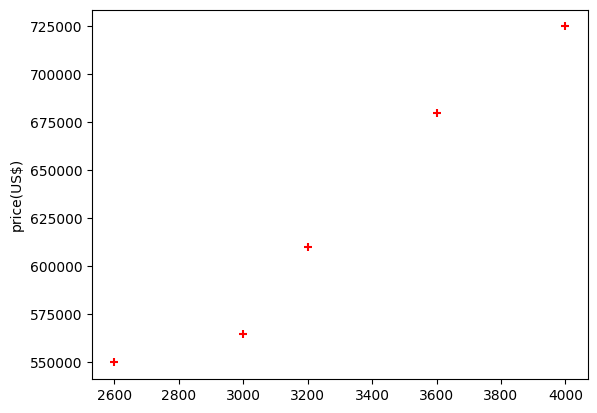

In [7]:
%matplotlib inline
plt.xlabel('')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color='red',marker='+')

In [8]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)   #fitting the model - fitting means training using available data points


LinearRegression()

In [9]:
value = 3300
#reshaped_value = np.array([[value]])
reg.predict([[value]])

D:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [10]:
m = reg.coef_     #m - slope of y = mx+b

In [11]:
b = reg.intercept_    #b - intercept of y = mx + b

In [12]:
y = m*value + b
y

array([628715.75342466])

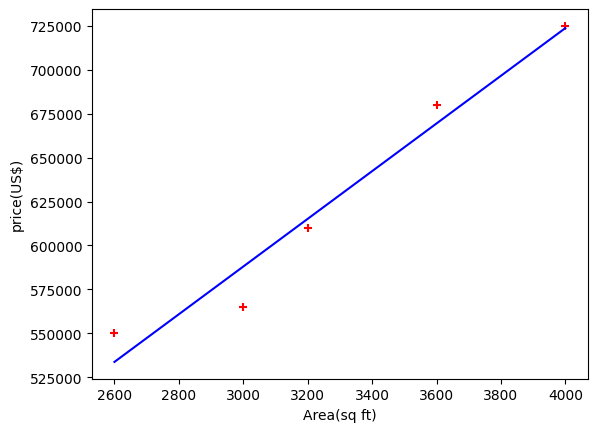

In [13]:
%matplotlib inline
plt.xlabel('Area(sq ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]), color='blue')

In [14]:
data = {
    'area':[1000,2000,3000,1500,1950,4050,6001,5245]
}

df2 = pd.DataFrame(data)
df2

,area
0,1000
1,2000
2,3000
3,1500
4,1950
5,4050
6,6001
7,5245


In [15]:
p = reg.predict(df2)
df2['prices'] = p
df2

,area,prices
0,1000,316404.109589
1,2000,452191.780822
2,3000,587979.452055
3,1500,384297.945205
4,1950,445402.397260
5,4050,730556.506849
6,6001,995478.253425
7,5245,892822.773973


In [16]:
df2.to_csv('predictions.csv',index=False)

## Multiple Variable Linear Regression

In [17]:
df = pd.read_csv('homeprices2.csv')

In [18]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### A variable is not available, so we need to tackle it 
Given these , we need to find a 
 - 3000 sq ft area, 3 bedroom, 40yr old house
 - 2500 sq ft area, 4 bedroom, 5yr old house

### Linear Eq = m1 * area + m2 * bedrooms + m3 * age + b,  
### area,bedroom,age are features

In [19]:
# To handle the NaN value ,we can take median of the other values and use it
# This is PREPROCESSING STEP
median_bedrooms = df.bedrooms.median()

In [20]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)

In [21]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [22]:
mul_reg = linear_model.LinearRegression()

In [23]:
mul_reg.fit(df[['area','bedrooms','age']],df.price)   # x values, y value

LinearRegression()

In [24]:
m1,m2,m3=mul_reg.coef_
b=mul_reg.intercept_

In [25]:
y1 = mul_reg.predict([[3000,3,40]])
y2 = mul_reg.predict([[2500,4,5]])

D:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
y1

array([498408.25158031])

In [27]:
y2

array([578876.03748933])

## Saving the Model, so that we dont always need to train - Using Pickle

In [28]:
import pickle

In [29]:
with open('./models/linearreg_model_pickle','wb') as f:
    pickle.dump(mul_reg,f)

### Opening the saved file and loading the model

In [30]:
with open('./models/linearreg_model_pickle','rb') as f:
    mp = pickle.load(f)

In [31]:
mp.predict([[4000,2,10]])

D:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([684033.35070349])